In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [30]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [32]:
df = pd.read_csv("/content/stocks.csv")
df.head()

,Date,Open,High,Low,Close
0,9/14/2018,2044.000000,2071.550049,2018.150024,2065.399902
1,9/17/2018,2070.000000,2077.800049,2054.550049,2074.149902
2,9/18/2018,2073.000000,2078.800049,2057.600098,2070.750000
3,9/19/2018,2071.899902,2089.000000,2066.850098,2077.899902
4,9/21/2018,2077.000000,2121.000000,2050.149902,2103.149902


In [46]:

rows, columns = df.shape
print(f"Number of Rows: {rows}, Number of Columns: {columns}")



Number of Rows: 1235, Number of Columns: 6


In [49]:
df.describe()

,Date,Open,High,Low,Close,Date_Ordinal
count,1235,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,2021-03-19 11:26:46.153846272,2812.540849,2839.710399,2782.527497,2810.995991,737868.476923
min,2018-09-14 00:00:00,1559.699951,1685.449951,1506.050049,1636.349976,736951.000000
25%,2019-12-23 12:00:00,2148.025024,2167.500000,2118.500000,2146.000000,737416.500000
50%,2021-03-18 00:00:00,3090.000000,3117.000000,3050.000000,3081.500000,737867.000000
75%,2022-06-16 12:00:00,3342.449951,3368.900024,3311.000000,3338.175049,738322.500000
max,2023-09-13 00:00:00,4033.949951,4043.000000,3980.000000,4019.149902,738776.000000
std,NaN,647.645064,649.281761,645.412745,647.713548,525.942081


In [50]:
df.isnull().sum().sum()

0

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Extract numerical features from the 'Date' column
# For example, you can use the ordinal representation of dates
df['Date_Ordinal'] = df['Date'].apply(lambda date: date.toordinal())

# Now use 'Date_Ordinal' as your independent variable
x = df['Date_Ordinal'].values
y = df[['Close','High','Low']].values

# ... (rest of your code for scaling, splitting, and fitting) ...

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(y)
y = scaler.transform(y)

In [53]:
LR = LinearRegression()

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [55]:
# Reshape x_train to a 2D array using reshape(-1, 1)
x_train = x_train.reshape(-1, 1)

# Fit the model
LR.fit(x_train, y_train)

LinearRegression()

In [56]:
y_pred = LR.predict(x_test.reshape(-1, 1))

In [57]:
def predict_stock_prices(user_input): # Modified to accept user_input as argument
    try:
        user_date = pd.to_datetime(user_input)
        user_date_ordinal = user_date.toordinal()

        user_input_reshaped = np.array([[user_date_ordinal]])

        prediction = LR.predict(user_input_reshaped)

        prediction_original_scale = scaler.inverse_transform(prediction)

        print("Prediction for", user_input, ":")
        print("Close:", prediction_original_scale[0][0])
        print("High:", prediction_original_scale[0][1])
        print("Low:", prediction_original_scale[0][2])
    except ValueError:
        print("Invalid date format. Please use 'YYYY-MM-DD'.")

# Get user input in a separate cell
user_input = input("Enter the date in 'YYYY-MM-DD' format (e.g., 2023-12-31): ")

# Call the function with the user input
predict_stock_prices(user_input)

Enter the date in 'YYYY-MM-DD' format (e.g., 2023-12-31): 2023-12-21
Prediction for 2023-12-21 :
Close: 3868.1555159101745
High: 3899.0245046890345
Low: 3836.6078908690056


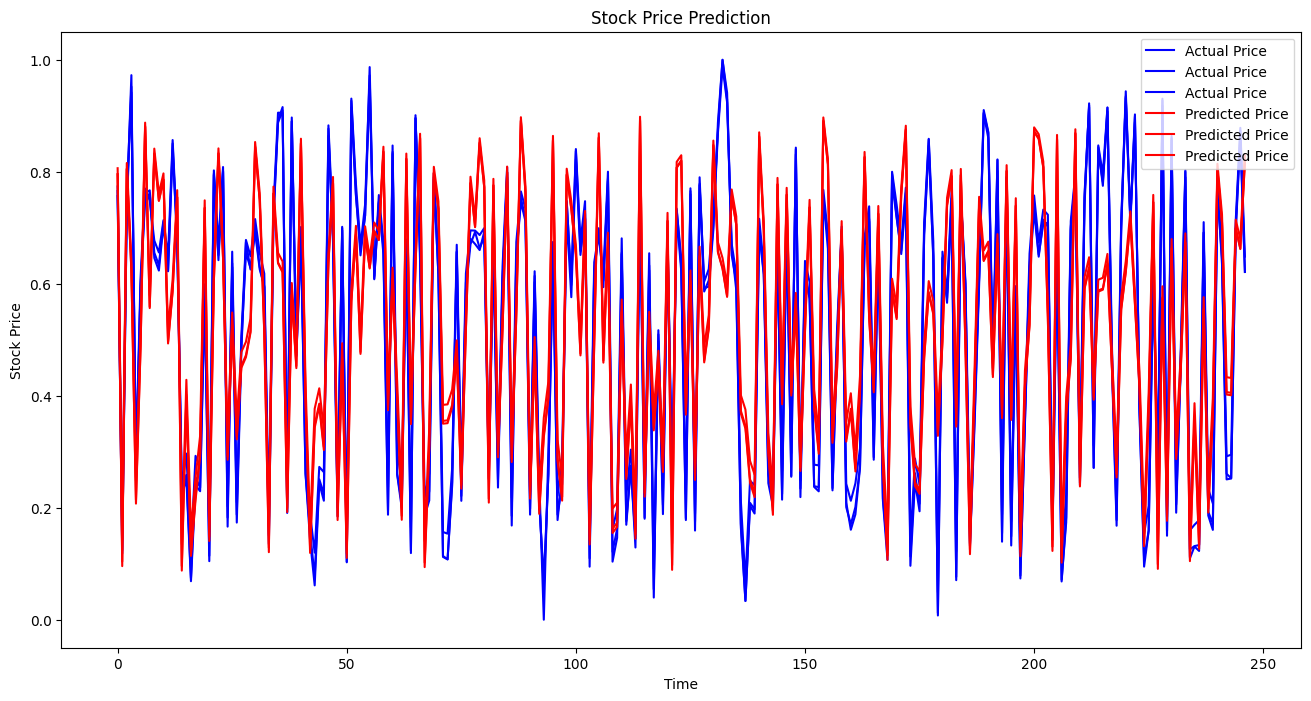

In [58]:
plt.figure(figsize = (16,8))
plt.plot(y_test, label='Actual Price', color='blue')
plt.plot(y_pred, label='Predicted Price', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

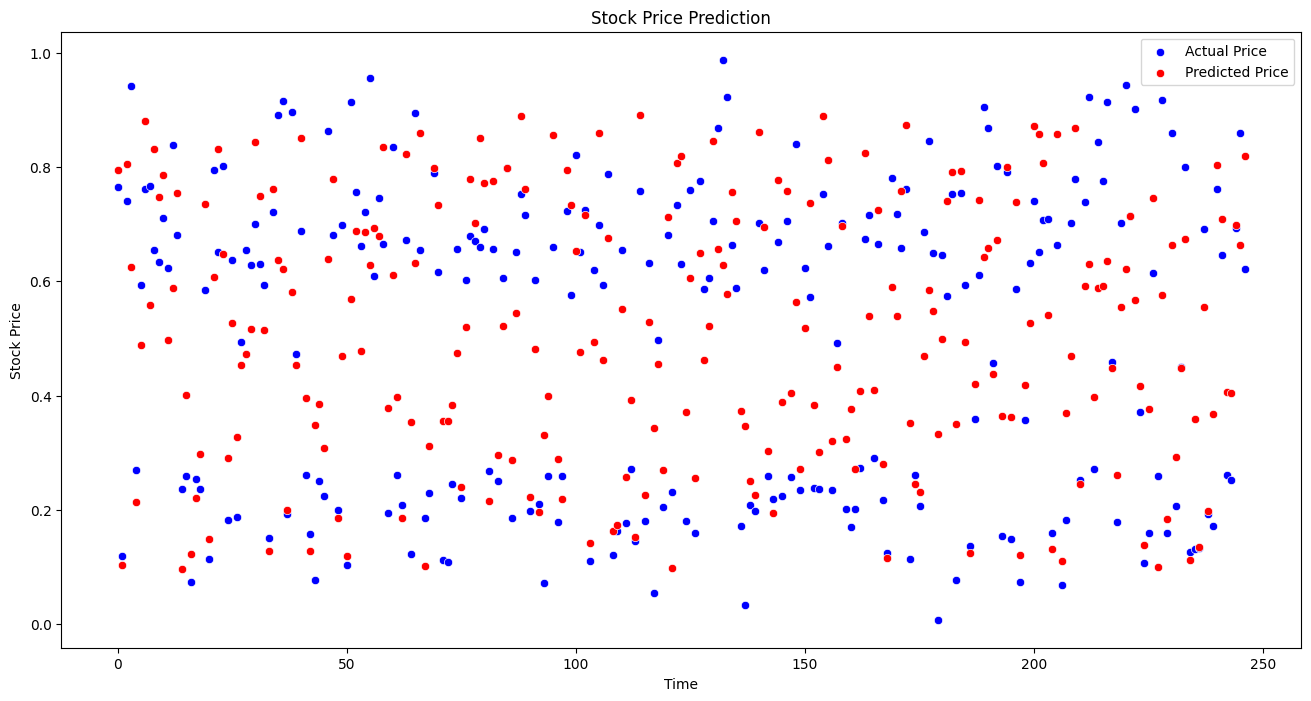

In [59]:
plt.figure(figsize = (16,8))
# Use sns.scatterplot instead of plt.scatterplot
sns.scatterplot(x=range(len(y_test)), y=y_test[:,0], label='Actual Price', color='blue') # Assuming you want the 'Close' price
sns.scatterplot(x=range(len(y_pred)), y=y_pred[:,0], label='Predicted Price', color='red')  # Assuming you want the 'Close' price
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [60]:
comparison_df = pd.DataFrame({'Actual_Close': y_test[:, 0],
                               'Actual_High': y_test[:, 1],
                               'Actual_Low': y_test[:, 2],
                               'Predicted_Close': y_pred[:, 0],
                               'Predicted_High': y_pred[:, 1],
                               'Predicted_Low': y_pred[:, 2]})
print(comparison_df)

     Actual_Close  Actual_High  Actual_Low  Predicted_Close  Predicted_High  \
0        0.765507     0.756527    0.773682         0.795204        0.795726   
1        0.118327     0.124091    0.160452         0.103878        0.095716   
2        0.740348     0.741660    0.758403         0.804867        0.805510   
3        0.941539     0.972429    0.951899         0.624788        0.623170   
4        0.269263     0.253886    0.285353         0.214121        0.207344   
..            ...          ...         ...              ...             ...   
242      0.260576     0.250578    0.291821         0.406498        0.402137   
243      0.252728     0.252169    0.294691         0.405180        0.400803   
244      0.694204     0.698840    0.713414         0.699455        0.698774   
245      0.859409     0.873810    0.878332         0.663000        0.661861   
246      0.620929     0.621026    0.648396         0.818922        0.819742   

     Predicted_Low  
0         0.806250  
1        

In [62]:
LR.score(x_train, y_train)

0.7273778692265558

In [63]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.022799111630780206


In [64]:
rse = np.sqrt(mse)
print("Root Mean Squared Error:", rse)

Root Mean Squared Error: 0.1509937469923182


In [68]:
features = ['Close', 'High', 'Low']
confusion_matrices = {}

for feature in features:
    confusion_matrices[feature] = pd.crosstab(
        y_test[:, features.index(feature)],
        y_pred[:, features.index(feature)],
        rownames=['Actual'],
        colnames=['Predicted']
    )

for feature, matrix in confusion_matrices.items():
    print(f"Confusion Matrix for {feature}:")
    print(matrix)

Confusion Matrix for Close:
Predicted  0.095972  0.097290  0.099047  0.102121  0.103878  0.110027  \
Actual                                                                  
0.007575          0         0         0         0         0         0   
0.033448          0         0         0         0         0         0   
0.054474          0         0         0         0         0         0   
0.068302          0         0         0         0         0         1   
0.071324          0         0         0         0         0         0   
...             ...       ...       ...       ...       ...       ...   
0.923535          0         0         0         0         0         0   
0.941539          0         0         0         0         0         0   
0.943596          0         0         0         0         0         0   
0.956144          0         0         0         0         0         0   
0.988018          0         0         0         0         0         0   

Predicted  0.112662  0

In [71]:



# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Features and target variable
X = df[['Open', 'High', 'Low', 'Date_Ordinal']]  # Features
y = df['Close']                                   # Target variable


In [79]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(criterion='squared_error', random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [80]:

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Squared Error: 710.007339855547
R-squared: 0.9982969214634939


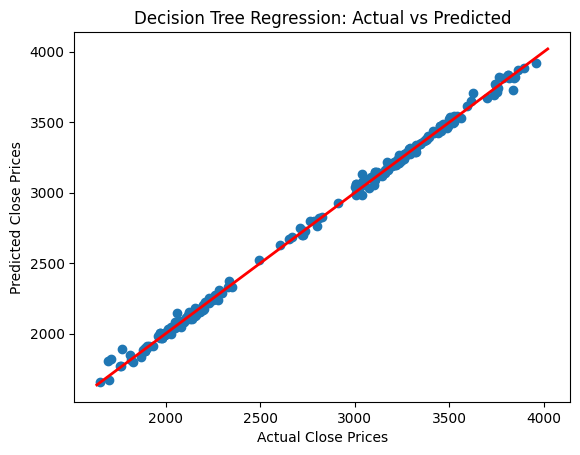

In [81]:

# Visualizing the predictions vs actual values (if applicable)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Close Prices')
plt.ylabel('Predicted Close Prices')
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)  # Line for perfect prediction
plt.show()